第 1 页抓取完成，共 60 套房源
第 2 页抓取完成，共 60 套房源
第 3 页抓取完成，共 60 套房源
第 4 页抓取完成，共 60 套房源
第 5 页抓取完成，共 60 套房源
第 6 页抓取完成，共 60 套房源
第 7 页抓取完成，共 60 套房源
第 8 页抓取完成，共 60 套房源
第 9 页抓取完成，共 60 套房源
第 10 页抓取完成，共 60 套房源
第 11 页抓取完成，共 60 套房源
第 12 页抓取完成，共 60 套房源
第 13 页抓取完成，共 60 套房源
第 14 页抓取完成，共 60 套房源
第 15 页抓取完成，共 60 套房源
第 16 页抓取完成，共 60 套房源
第 17 页抓取完成，共 60 套房源
第 18 页抓取完成，共 60 套房源
第 19 页抓取完成，共 60 套房源
第 20 页抓取完成，共 60 套房源
成功抓取 1200 条房源数据
        总价       单价      面积
0  4250000  29946.0  141.92
1  2280000  26089.0   87.39
2  5800000  41079.0  141.19
3  2580000  29274.0   88.13
4  4600000  37249.0  123.49
第 1 页抓取完成，共 60 套房源
第 2 页抓取完成，共 60 套房源
第 3 页抓取完成，共 60 套房源
第 4 页抓取完成，共 60 套房源
第 5 页抓取完成，共 60 套房源
第 6 页抓取完成，共 60 套房源
第 7 页抓取完成，共 60 套房源
第 8 页抓取完成，共 60 套房源
第 9 页抓取完成，共 60 套房源
第 10 页抓取完成，共 60 套房源
第 11 页抓取完成，共 60 套房源
第 12 页抓取完成，共 51 套房源
  月租    面积  每平米月租
3000  52.0  57.69
3000  60.0  50.00
6500 140.0  46.43
3600  76.0  47.37
3700  85.0  43.53
成功抓取 711 条房源数据
     月租     面积  每平米月租
0  3000   52.0  57.69
1  3000   60.0  50.00
2  65

/var/folders/rn/jxw893090rg08hw65kt7z5cw0000gn/T/ipykernel_4819/173087719.py:817: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


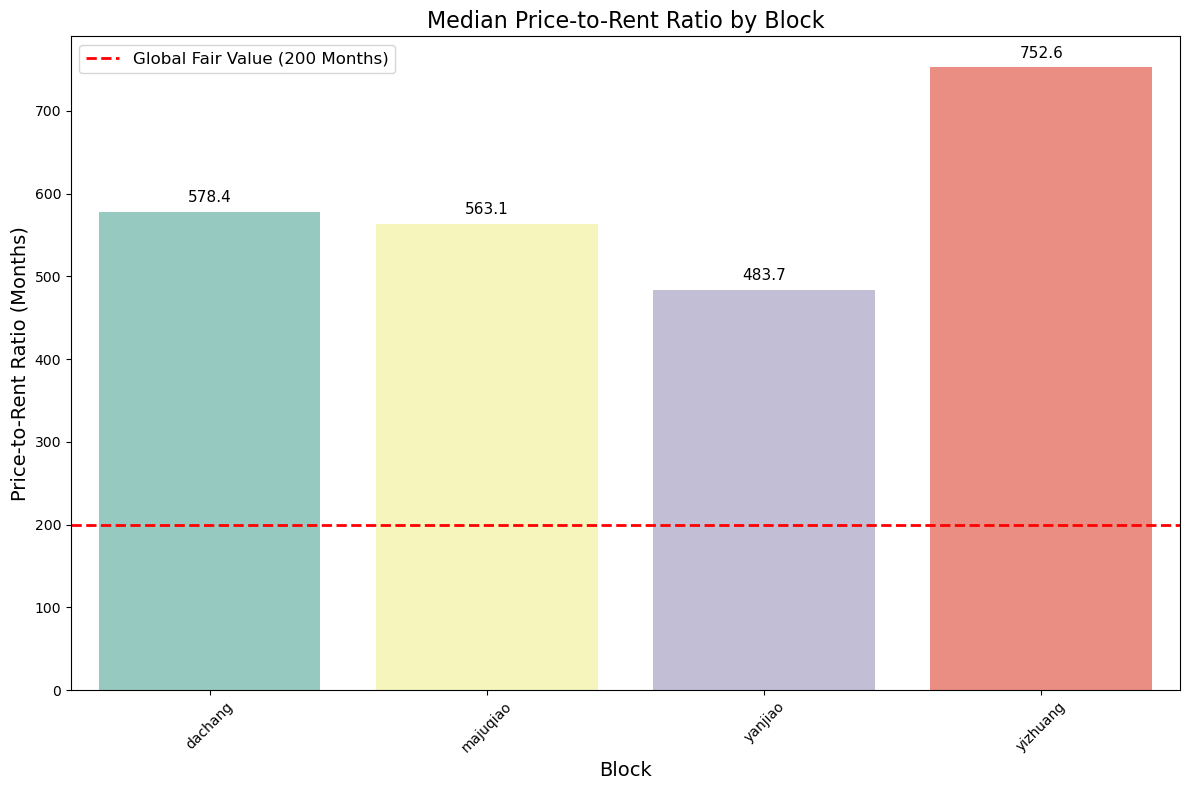


 Price-to-Rent Ratio Results:
      Block  Price-to-Rent Ratio (Months)
0   dachang                         578.4
1  majuqiao                         563.1
2   yanjiao                         483.7
3  yizhuang                         752.6

===== Analysis Conclusion =====
===== Regression Models & Price-to-Rent Ratio Analysis =====
 Loading data files...
- Unique blocks found: ['dachang', 'majuqiao', 'yanjiao', 'yizhuang'] (4 types)

===== Training Regression Models =====
 Model 1 (Original Price) trained. R²: 0.7937
 Model 1+ (Enhanced Price) trained. R²: 0.7964
 Model 2 (Original Rent) trained. R²: 0.6631
 Model 2+ (Enhanced Rent) trained. R²: 0.6681

===== Model R² Comparison =====
Price models: Original 0.7937 vs Enhanced 0.7964
Rent models: Original 0.6631 vs Enhanced 0.6681

Enhanced price model performs better - indicates non-linear relationships in data
Enhanced rent model performs better - indicates non-linear relationships in data

===== Predictions & Price-to-Rent Ratio Cal

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, StaleElementReferenceException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import os
import time
import re

### 抓取马驹桥数据
def crawl_majuqiao():
    driver = webdriver.Chrome()
    url = 'https://esf.fang.com/house-a010-b05048/'
    driver.get(url)

    html_list = []
    i = 0
    Num_Pages = 20

    while i < Num_Pages:
        try:
            house_items = driver.find_elements(By.CSS_SELECTOR, ".shop_list dl")
            for item in house_items:
                html_list.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(house_items)} 套房源")

            next_page = driver.find_element('class name', 'last')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_properties = []
    for html in html_list:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_b = soup.find('span', class_='red').find('b') if soup.find('span', class_='red') else None
        price_unit = soup.find('span', class_='red').get_text(strip=True) if soup.find('span', class_='red') else ""

        if price_b:
            total_price_text = price_b.get_text(strip=True) + '万'
        elif '万' in price_unit:
            match = re.search(r'(\d+\.?\d*)万', price_unit)
            total_price_text = match.group(1) + '万' if match else None
        else:
            total_price_text = None

        if total_price_text and total_price_text != "未知":
            try:
                num_str = total_price_text.replace('万', '')
                total_price = int(float(num_str) * 10000)
            except ValueError:
                total_price = None
        else:
            total_price = None

        property_info['总价'] = total_price

        unit_price_span = soup.find('dd', class_='price_right').find('span', string=re.compile(r'元/㎡'))
        if unit_price_span:
            raw_text = unit_price_span.get_text(strip=True)
            num_match = re.search(r'(\d+\.?\d*)', raw_text)
            property_info['单价'] = float(num_match.group(1)) if num_match else None
        else:
            property_info['单价'] = None

        tel_shop = soup.find('p', class_='tel_shop')
        if tel_shop:
            for tag in tel_shop.find_all(['a', 'span']):
                tag.extract()

            text = tel_shop.get_text(strip=True)
            parts = [part.strip() for part in text.split('|')]

            area = "未知"
            for part in parts:
                if '㎡' in part:
                    area_match = re.search(r'(\d+\.?\d*)㎡', part)
                    if area_match:
                        area = float(area_match.group(1))
                    break
            property_info['面积'] = area
        else:
            property_info['面积'] = "未知"

        all_properties.append(property_info)

    df = pd.DataFrame(all_properties)
    if not df.empty:
        df.to_csv("MAJUQIAO_Housing_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df.head())
    driver.quit()

    # 爬取租房价格
    driver = webdriver.Chrome()
    url = 'https://zu.fang.com/house-a010-b05048/n31/'
    driver.get(url)
    html_list_rent = []
    i = 0
    Num_Pages = 20
    while i < Num_Pages:
        try:
            rent_items = driver.find_elements(By.CSS_SELECTOR, ".houseList dl")
            for item in rent_items:
                html_list_rent.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(rent_items)} 套房源")

            next_page = driver.find_element(By.LINK_TEXT, '下一页')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_rent_properties = []
    for html in html_list_rent:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_span = soup.find('span', class_='price')
        if price_span:
            raw_price = price_span.get_text(strip=True)
            num_match = re.search(r'(\d+)', raw_price)
            property_info['月租'] = int(num_match.group(1)) if num_match else None
        else:
            property_info['月租'] = None

        info_p = soup.find('p', class_='font15 mt12 bold')
        if info_p:
            text = info_p.get_text(strip=True)
            parts = [part.strip() for part in text.split('|') if part.strip()]

            area_part = None
            for part in parts:
                if '㎡' in part:
                    area_part = part
                    break

            if area_part:
                num_match = re.search(r'(\d+\.?\d*)', area_part)
                property_info['面积'] = float(num_match.group(1)) if num_match else None
            else:
                property_info['面积'] = None
        else:
            property_info['面积'] = None
       
        if property_info['月租'] and property_info['面积']:
            property_info['每平米月租'] = round(property_info['月租'] / property_info['面积'], 2)
        else:
            property_info['每平米月租'] = None

        all_rent_properties.append(property_info)

    df_rent = pd.DataFrame(all_rent_properties)
    print(df_rent.head().to_string(index=False))

    if not df_rent.empty:
        df_rent.to_csv("MAJUQIAO_Rent_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df_rent)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df_rent.head())
    driver.quit()

### 抓取大厂数据
def crawl_dachang():
    driver = webdriver.Chrome()
    url = 'https://lf.esf.fang.com/house-a010278/'
    driver.get(url)

    html_list = []
    i = 0
    Num_Pages = 20

    while i < Num_Pages:
        try:
            house_items = driver.find_elements(By.CSS_SELECTOR, ".shop_list dl")
            for item in house_items:
                html_list.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(house_items)} 套房源")

            next_page = driver.find_element('class name', 'last')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_properties = []
    for html in html_list:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_b = soup.find('span', class_='red').find('b') if soup.find('span', class_='red') else None
        price_unit = soup.find('span', class_='red').get_text(strip=True) if soup.find('span', class_='red') else ""

        if price_b:
            total_price_text = price_b.get_text(strip=True) + '万'
        elif '万' in price_unit:
            match = re.search(r'(\d+\.?\d*)万', price_unit)
            total_price_text = match.group(1) + '万' if match else None
        else:
            total_price_text = None

        if total_price_text and total_price_text != "未知":
            try:
                num_str = total_price_text.replace('万', '')
                total_price = int(float(num_str) * 10000)
            except ValueError:
                total_price = None
        else:
            total_price = None

        property_info['总价'] = total_price

        unit_price_span = soup.find('dd', class_='price_right').find('span', string=re.compile(r'元/㎡'))
        if unit_price_span:
            raw_text = unit_price_span.get_text(strip=True)
            num_match = re.search(r'(\d+\.?\d*)', raw_text)
            property_info['单价'] = float(num_match.group(1)) if num_match else None
        else:
            property_info['单价'] = None

        tel_shop = soup.find('p', class_='tel_shop')
        if tel_shop:
            for tag in tel_shop.find_all(['a', 'span']):
                tag.extract()

            text = tel_shop.get_text(strip=True)
            parts = [part.strip() for part in text.split('|')]

            area = "未知"
            for part in parts:
                if '㎡' in part:
                    area_match = re.search(r'(\d+\.?\d*)㎡', part)
                    if area_match:
                        area = float(area_match.group(1))
                    break
            property_info['面积'] = area
        else:
            property_info['面积'] = "未知"

        all_properties.append(property_info)

    df = pd.DataFrame(all_properties)
    if not df.empty:
        df.to_csv("DACHANG_Housing_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df.head())
    driver.quit()

    # 爬取租房价格
    driver = webdriver.Chrome()
    url = 'https://lf.zu.fang.com/house-a010278/n31/'
    driver.get(url)
    html_list_rent = []
    i = 0
    Num_Pages = 20
    while i < Num_Pages:
        try:
            rent_items = driver.find_elements(By.CSS_SELECTOR, ".houseList dl")
            for item in rent_items:
                html_list_rent.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(rent_items)} 套房源")

            next_page = driver.find_element(By.LINK_TEXT, '下一页')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_rent_properties = []
    for html in html_list_rent:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_span = soup.find('span', class_='price')
        if price_span:
            raw_price = price_span.get_text(strip=True)
            num_match = re.search(r'(\d+)', raw_price)
            property_info['月租'] = int(num_match.group(1)) if num_match else None
        else:
            property_info['月租'] = None

        info_p = soup.find('p', class_='font15 mt12 bold')
        if info_p:
            text = info_p.get_text(strip=True)
            parts = [part.strip() for part in text.split('|') if part.strip()]

            area_part = None
            for part in parts:
                if '㎡' in part:
                    area_part = part
                    break

            if area_part:
                num_match = re.search(r'(\d+\.?\d*)', area_part)
                property_info['面积'] = float(num_match.group(1)) if num_match else None
            else:
                property_info['面积'] = None
        else:
            property_info['面积'] = None
       
        if property_info['月租'] and property_info['面积']:
            property_info['每平米月租'] = round(property_info['月租'] / property_info['面积'], 2)
        else:
            property_info['每平米月租'] = None

        all_rent_properties.append(property_info)

    df_rent = pd.DataFrame(all_rent_properties)
    print(df_rent.head().to_string(index=False))

    if not df_rent.empty:
        df_rent.to_csv("DACHANG_Rent_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df_rent)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df_rent.head())
    driver.quit()

### 抓取燕郊数据
def crawl_yanjiao():
    driver = webdriver.Chrome()
    url = 'https://lf.esf.fang.com/house-a014822/'
    driver.get(url)

    html_list = []
    i = 0
    Num_Pages = 20

    while i < Num_Pages:
        try:
            house_items = driver.find_elements(By.CSS_SELECTOR, ".shop_list dl")
            for item in house_items:
                html_list.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(house_items)} 套房源")

            next_page = driver.find_element('class name', 'last')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_properties = []
    for html in html_list:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_b = soup.find('span', class_='red').find('b') if soup.find('span', class_='red') else None
        price_unit = soup.find('span', class_='red').get_text(strip=True) if soup.find('span', class_='red') else ""

        if price_b:
            total_price_text = price_b.get_text(strip=True) + '万'
        elif '万' in price_unit:
            match = re.search(r'(\d+\.?\d*)万', price_unit)
            total_price_text = match.group(1) + '万' if match else None
        else:
            total_price_text = None

        if total_price_text and total_price_text != "未知":
            try:
                num_str = total_price_text.replace('万', '')
                total_price = int(float(num_str) * 10000)
            except ValueError:
                total_price = None
        else:
            total_price = None

        property_info['总价'] = total_price

        unit_price_span = soup.find('dd', class_='price_right').find('span', string=re.compile(r'元/㎡'))
        if unit_price_span:
            raw_text = unit_price_span.get_text(strip=True)
            num_match = re.search(r'(\d+\.?\d*)', raw_text)
            property_info['单价'] = float(num_match.group(1)) if num_match else None
        else:
            property_info['单价'] = None

        tel_shop = soup.find('p', class_='tel_shop')
        if tel_shop:
            for tag in tel_shop.find_all(['a', 'span']):
                tag.extract()

            text = tel_shop.get_text(strip=True)
            parts = [part.strip() for part in text.split('|')]

            area = "未知"
            for part in parts:
                if '㎡' in part:
                    area_match = re.search(r'(\d+\.?\d*)㎡', part)
                    if area_match:
                        area = float(area_match.group(1))
                    break
            property_info['面积'] = area
        else:
            property_info['面积'] = "未知"

        all_properties.append(property_info)

    df = pd.DataFrame(all_properties)
    if not df.empty:
        df.to_csv("YANJIAO_Housing_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df.head())
    driver.quit()

    # 爬取租房价格
    driver = webdriver.Chrome()
    url = 'https://lf.zu.fang.com/house-a014822/n31/'
    driver.get(url)
    html_list_rent = []
    i = 0
    Num_Pages = 20
    while i < Num_Pages:
        try:
            rent_items = driver.find_elements(By.CSS_SELECTOR, ".houseList dl")
            for item in rent_items:
                html_list_rent.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(rent_items)} 套房源")

            next_page = driver.find_element(By.LINK_TEXT, '下一页')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_rent_properties = []
    for html in html_list_rent:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_span = soup.find('span', class_='price')
        if price_span:
            raw_price = price_span.get_text(strip=True)
            num_match = re.search(r'(\d+)', raw_price)
            property_info['月租'] = int(num_match.group(1)) if num_match else None
        else:
            property_info['月租'] = None

        info_p = soup.find('p', class_='font15 mt12 bold')
        if info_p:
            text = info_p.get_text(strip=True)
            parts = [part.strip() for part in text.split('|') if part.strip()]

            area_part = None
            for part in parts:
                if '㎡' in part:
                    area_part = part
                    break

            if area_part:
                num_match = re.search(r'(\d+\.?\d*)', area_part)
                property_info['面积'] = float(num_match.group(1)) if num_match else None
            else:
                property_info['面积'] = None
        else:
            property_info['面积'] = None
       
        if property_info['月租'] and property_info['面积']:
            property_info['每平米月租'] = round(property_info['月租'] / property_info['面积'], 2)
        else:
            property_info['每平米月租'] = None

        all_rent_properties.append(property_info)

    df_rent = pd.DataFrame(all_rent_properties)
    print(df_rent.head().to_string(index=False))

    if not df_rent.empty:
        df_rent.to_csv("YANJIAO_Rent_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df_rent)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df_rent.head())
    driver.quit()

### 抓取亦庄数据
def crawl_yizhuang():
    driver = webdriver.Chrome()
    url = 'https://esf.fang.com/house-a010-b01515/'
    driver.get(url)

    html_list = []
    i = 0
    Num_Pages = 20

    while i < Num_Pages:
        try:
            house_items = driver.find_elements(By.CSS_SELECTOR, ".shop_list dl")
            for item in house_items:
                html_list.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(house_items)} 套房源")

            next_page = driver.find_element('class name', 'last')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_properties = []
    for html in html_list:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_b = soup.find('span', class_='red').find('b') if soup.find('span', class_='red') else None
        price_unit = soup.find('span', class_='red').get_text(strip=True) if soup.find('span', class_='red') else ""

        if price_b:
            total_price_text = price_b.get_text(strip=True) + '万'
        elif '万' in price_unit:
            match = re.search(r'(\d+\.?\d*)万', price_unit)
            total_price_text = match.group(1) + '万' if match else None
        else:
            total_price_text = None

        if total_price_text and total_price_text != "未知":
            try:
                num_str = total_price_text.replace('万', '')
                total_price = int(float(num_str) * 10000)
            except ValueError:
                total_price = None
        else:
            total_price = None

        property_info['总价'] = total_price

        unit_price_span = soup.find('dd', class_='price_right').find('span', string=re.compile(r'元/㎡'))
        if unit_price_span:
            raw_text = unit_price_span.get_text(strip=True)
            num_match = re.search(r'(\d+\.?\d*)', raw_text)
            property_info['单价'] = float(num_match.group(1)) if num_match else None
        else:
            property_info['单价'] = None

        tel_shop = soup.find('p', class_='tel_shop')
        if tel_shop:
            for tag in tel_shop.find_all(['a', 'span']):
                tag.extract()

            text = tel_shop.get_text(strip=True)
            parts = [part.strip() for part in text.split('|')]

            area = "未知"
            for part in parts:
                if '㎡' in part:
                    area_match = re.search(r'(\d+\.?\d*)㎡', part)
                    if area_match:
                        area = float(area_match.group(1))
                    break
            property_info['面积'] = area
        else:
            property_info['面积'] = "未知"

        all_properties.append(property_info)

    df = pd.DataFrame(all_properties)
    if not df.empty:
        df.to_csv("YIZHUANG_Housing_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df.head())
    driver.quit()

    # 爬取租房价格
    driver = webdriver.Chrome()
    url = 'https://zu.fang.com/house-a010-b01515/n31/'
    driver.get(url)
    html_list_rent = []
    i = 0
    Num_Pages = 20
    while i < Num_Pages:
        try:
            rent_items = driver.find_elements(By.CSS_SELECTOR, ".houseList dl")
            for item in rent_items:
                html_list_rent.append(item.get_attribute('outerHTML'))
            
            print(f"第 {i+1} 页抓取完成，共 {len(rent_items)} 套房源")

            next_page = driver.find_element(By.LINK_TEXT, '下一页')
            next_page.click()
            i += 1
        except NoSuchElementException:
            break

    all_rent_properties = []
    for html in html_list_rent:
        soup = BeautifulSoup(html, 'html.parser')
        property_info = {}

        price_span = soup.find('span', class_='price')
        if price_span:
            raw_price = price_span.get_text(strip=True)
            num_match = re.search(r'(\d+)', raw_price)
            property_info['月租'] = int(num_match.group(1)) if num_match else None
        else:
            property_info['月租'] = None

        info_p = soup.find('p', class_='font15 mt12 bold')
        if info_p:
            text = info_p.get_text(strip=True)
            parts = [part.strip() for part in text.split('|') if part.strip()]

            area_part = None
            for part in parts:
                if '㎡' in part:
                    area_part = part
                    break

            if area_part:
                num_match = re.search(r'(\d+\.?\d*)', area_part)
                property_info['面积'] = float(num_match.group(1)) if num_match else None
            else:
                property_info['面积'] = None
        else:
            property_info['面积'] = None
       
        if property_info['月租'] and property_info['面积']:
            property_info['每平米月租'] = round(property_info['月租'] / property_info['面积'], 2)
        else:
            property_info['每平米月租'] = None

        all_rent_properties.append(property_info)

    df_rent = pd.DataFrame(all_rent_properties)
    print(df_rent.head().to_string(index=False))

    if not df_rent.empty:
        df_rent.to_csv("YIZHUANG_Rent_Price.csv", index=False, encoding='utf-8-sig')
        print(f"成功抓取 {len(df_rent)} 条房源数据")
    else:
        print("未能抓取到任何数据")

    print(df_rent.head())
    driver.quit()

### 合并数据
def combine_data():
    rent_price_files = [
        'DACHANG_Rent_Price.csv',
        'MAJUQIAO_Rent_Price.csv',
        'YANJIAO_Rent_Price.csv',
        'YIZHUANG_Rent_Price.csv'
    ]

    housing_price_files = [
        'DACHANG_Housing_Price.csv',
        'MAJUQIAO_Housing_Price.csv',
        'YANJIAO_Housing_Price.csv',
        'YIZHUANG_Housing_Price.csv'
    ]

    rent_price_dfs = []
    for file in rent_price_files:
        df = pd.read_csv(file)
        block_name = file.split('/')[-1].split('_')[0].lower()
        df['Block'] = block_name
        rent_price_dfs.append(df)

    rent_price_combined = pd.concat(rent_price_dfs, ignore_index=True)

    housing_price_dfs = []
    for file in housing_price_files:
        df = pd.read_csv(file)
        block_name = file.split('/')[-1].split('_')[0].lower()
        df['Block'] = block_name
        housing_price_dfs.append(df)

    housing_price_combined = pd.concat(housing_price_dfs, ignore_index=True)

    Housing_Price = housing_price_combined[['总价', '单价', '面积', 'Block']]
    Rent_Price = rent_price_combined[['月租', '面积', '每平米月租', 'Block']]

    Housing_Price.to_csv('Housing_Price.csv', index=False)
    Rent_Price.to_csv('Rent_Price.csv', index=False)

### 数据分析部分
def analyze_data():
    if not os.path.exists('results'):
        os.makedirs('results')
        print("Created 'results' folder to save outputs")
    
    def load_data():
        try:
            housing_df = pd.read_csv('Housing_Price.csv')
            rent_df = pd.read_csv('Rent_Price.csv')
            
            assert '总价' in housing_df.columns and 'Block' in housing_df.columns, "Housing_Price.csv missing required columns"
            assert '月租' in rent_df.columns and '每平米月租' in rent_df.columns, "Rent_Price.csv missing required columns"
            
            print(f"Data loaded successfully!")
            print(f"- Housing data shape: {housing_df.shape} (4 blocks, {housing_df['Block'].nunique()} unique)")
            print(f"- Rent data shape: {rent_df.shape} (4 blocks, {rent_df['Block'].nunique()} unique)")
            return housing_df, rent_df
        
        except FileNotFoundError as e:
            print(f"❌ Error: File not found - {e}")
            raise
        except Exception as e:
            print(f"❌ Data load failed: {e}")
            raise
    
    def detect_outliers(df, column, threshold=3):
        series = df[column].dropna()
        z_scores = np.abs(stats.zscore(series))
        outlier_indices = series.index[z_scores > threshold]
        return df.loc[outlier_indices]
    
    def analyze_data(housing_df, rent_df):
        print("\n===== Step 1: Data Description & Outlier Detection =====")
        
        housing_stats = housing_df[['总价', '单价', '面积']].describe().round(2)
        rent_stats = rent_df[['月租', '面积', '每平米月租']].describe().round(2)
        
        housing_stats.to_csv('results/housing_descriptive_stats.csv')
        rent_stats.to_csv('results/rent_descriptive_stats.csv')
        
        print("\n Housing Price Statistics (RMB):")
        print(housing_stats)
        print("\n Rent Statistics (RMB):")
        print(rent_stats)
        
        blocks = housing_df['Block'].unique()
        outlier_summary = []
        
        for block in blocks:
            h_block = housing_df[housing_df['Block'] == block]
            r_block = rent_df[rent_df['Block'] == block]
            
            h_outliers = detect_outliers(h_block, '总价')
            r_outliers = detect_outliers(r_block, '月租')
            
            h_outliers.to_csv(f'results/housing_outliers_{block}.csv', index=False)
            r_outliers.to_csv(f'results/rent_outliers_{block}.csv', index=False)
            
            outlier_summary.append({
                'Block': block,
                'Housing_Outliers (Total Price)': len(h_outliers),
                'Rent_Outliers (Monthly)': len(r_outliers),
                'Housing_Samples': len(h_block),
                'Rent_Samples': len(r_block)
            })
        
        outlier_df = pd.DataFrame(outlier_summary)
        print("\n Outlier Summary by Block:")
        print(outlier_df)
        outlier_df.to_csv('results/outlier_summary.csv', index=False)
    
    def calculate_per_sqm_metrics(housing_df, rent_df):
        print("\n===== Step 2: Per Square Meter Metrics by Block =====")
        
        housing_per_sqm = housing_df.groupby('Block')['单价'].agg([
            'mean', 'median', 'std', 'count'
        ]).round(2)
        housing_per_sqm.columns = ['Mean (RMB/㎡)', 'Median (RMB/㎡)', 'Std (RMB/㎡)', 'Sample Count']
        
        rent_per_sqm = rent_df.groupby('Block')['每平米月租'].agg([
            'mean', 'median', 'std', 'count'
        ]).round(2)
        rent_per_sqm.columns = ['Mean (RMB/㎡/month)', 'Median (RMB/㎡/month)', 'Std (RMB/㎡/month)', 'Sample Count']
        
        combined_metrics = pd.merge(
            housing_per_sqm, rent_per_sqm, on='Block', suffixes=('_Price', '_Rent')
        )
        
        print("\n Per Square Meter Metrics:")
        print(combined_metrics)
        combined_metrics.to_csv('results/per_sqm_metrics.csv')
        print("\n Metrics saved to 'results/per_sqm_metrics.csv'")
        return combined_metrics
    
    def calculate_price_rent_ratio(housing_df, rent_df):
        price_median = housing_df.groupby('Block')['单价'].median().reset_index()
        price_median.columns = ['Block', 'Price_Median (RMB/㎡)']
        
        rent_median = rent_df.groupby('Block')['每平米月租'].median().reset_index()
        rent_median.columns = ['Block', 'Rent_Median (RMB/㎡/month)']
        
        ratio_df = pd.merge(price_median, rent_median, on='Block')
        ratio_df['Price-to-Rent Ratio (Months)'] = (ratio_df['Price_Median (RMB/㎡)'] / ratio_df['Rent_Median (RMB/㎡/month)']).round(1)
        
        plt.figure(figsize=(12, 8))
        bar_plot = sns.barplot(
            x='Block', 
            y='Price-to-Rent Ratio (Months)', 
            data=ratio_df,
            palette='Set3'
        )
        
        plt.axhline(
            y=200, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label='Global Fair Value (200 Months)'
        )
        
        plt.title('Median Price-to-Rent Ratio by Block', fontsize=16)
        plt.xlabel('Block', fontsize=14)
        plt.ylabel('Price-to-Rent Ratio (Months)', fontsize=14)
        plt.xticks(rotation=45)
        plt.legend(fontsize=12)
        
        for p in bar_plot.patches:
            bar_plot.annotate(
                f'{p.get_height():.1f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points',
                fontsize=11
            )
        
        plt.tight_layout()
        plt.savefig('results/figureA_price_rent_ratio_bar.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n Price-to-Rent Ratio Results:")
        print(ratio_df[['Block', 'Price-to-Rent Ratio (Months)']])
        ratio_df.to_csv('results/price_rent_ratio.csv', index=False)
        
        print("\n===== Analysis Conclusion =====")
        return ratio_df
    
    housing_data, rent_data = load_data()
    analyze_data(housing_data, rent_data)
    calculate_per_sqm_metrics(housing_data, rent_data)
    calculate_price_rent_ratio(housing_data, rent_data)

### 回归模型分析
def regression_analysis():
    if not os.path.exists('results'):
        os.makedirs('results')
        print(" 'results' folder created for outputs")
    
    def load_data():
        try:
            print(" Loading data files...")
            housing_df = pd.read_csv('Housing_Price.csv')
            rent_df = pd.read_csv('Rent_Price.csv')
            
            possible_housing_mappings = [
                {'Block': 'Block', '面积': 'area', '单价': 'price_per_sqm'},
            ]
            
            possible_rent_mappings = [
                {'Block': 'Block', '面积': 'area', '每平米月租': 'rent_per_sqm'},
            ]
            
            housing_cols = None
            for mapping in possible_housing_mappings:
                if all(col in housing_df.columns for col in mapping.keys()):
                    housing_cols = mapping
                    break
                    
            rent_cols = None
            for mapping in possible_rent_mappings:
                if all(col in rent_df.columns for col in mapping.keys()):
                    rent_cols = mapping
                    break
            
            housing_df = housing_df.rename(columns=housing_cols)[['Block', 'area', 'price_per_sqm']]
            rent_df = rent_df.rename(columns=rent_cols)[['Block', 'area', 'rent_per_sqm']]
            
            housing_df['area_squared'] = housing_df['area'] **2
            rent_df['area_squared'] = rent_df['area']** 2
            
            housing_df['Block'] = housing_df['Block'].astype(str).str.strip()
            rent_df['Block'] = rent_df['Block'].astype(str).str.strip()
            
            for col in ['area', 'area_squared', 'price_per_sqm']:
                housing_df[col] = pd.to_numeric(housing_df[col], errors='coerce')
            
            for col in ['area', 'area_squared', 'rent_per_sqm']:
                rent_df[col] = pd.to_numeric(rent_df[col], errors='coerce')
            
            unique_blocks = sorted(housing_df['Block'].unique())
            print(f"- Unique blocks found: {unique_blocks} ({len(unique_blocks)} types)")
            
            return housing_df, rent_df
        
        except FileNotFoundError as e:
            print(f" File not found: {str(e)}")
            print("Please ensure 'Housing_Price.csv' and 'Rent_Price.csv' are in the same directory")
            raise
        except Exception as e:
            print(f" Data processing error: {str(e)}")
            raise
    
    def train_regression_models(housing_df, rent_df):
        print("\n===== Training Regression Models =====")
        
        if len(housing_df) < 5:
            print(f"Warning: Small housing dataset ({len(housing_df)} samples)")
        if len(rent_df) < 5:
            print(f"Warning: Small rent dataset ({len(rent_df)} samples)")
        
        preprocessor_original = ColumnTransformer(
            transformers=[
                ('categorical', OneHotEncoder(drop='first', sparse_output=False), ['Block']),
                ('numerical', 'passthrough', ['area'])
            ]
        )
        
        preprocessor_enhanced = ColumnTransformer(
            transformers=[
                ('categorical', OneHotEncoder(drop='first', sparse_output=False), ['Block']),
                ('numerical', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False), ['area'])
            ]
        )
        
        X1 = housing_df[['Block', 'area']]
        y1 = housing_df['price_per_sqm']
        
        if X1.shape[0] == 0:
            raise ValueError("No features available for price model training")
        
        model_price = Pipeline(steps=[
            ('preprocessor', preprocessor_original),
            ('regressor', LinearRegression())
        ])
        model_price.fit(X1, y1)
        y1_pred = model_price.predict(X1)
        r2_price = r2_score(y1, y1_pred)
        print(f" Model 1 (Original Price) trained. R²: {r2_price:.4f}")
        
        model_price_plus = Pipeline(steps=[
            ('preprocessor', preprocessor_enhanced),
            ('regressor', LinearRegression())
        ])
        model_price_plus.fit(X1, y1)
        y1_plus_pred = model_price_plus.predict(X1)
        r2_price_plus = r2_score(y1, y1_plus_pred)
        print(f" Model 1+ (Enhanced Price) trained. R²: {r2_price_plus:.4f}")
        
        X2 = rent_df[['Block', 'area']]
        y2 = rent_df['rent_per_sqm']
        
        if X2.shape[0] == 0:
            raise ValueError("No features available for rent model training")
        
        model_rent = Pipeline(steps=[
            ('preprocessor', preprocessor_original),
            ('regressor', LinearRegression())
        ])
        model_rent.fit(X2, y2)
        y2_pred = model_rent.predict(X2)
        r2_rent = r2_score(y2, y2_pred)
        print(f" Model 2 (Original Rent) trained. R²: {r2_rent:.4f}")
        
        model_rent_plus = Pipeline(steps=[
            ('preprocessor', preprocessor_enhanced),
            ('regressor', LinearRegression())
        ])
        model_rent_plus.fit(X2, y2)
        y2_plus_pred = model_rent_plus.predict(X2)
        r2_rent_plus = r2_score(y2, y2_plus_pred)
        print(f" Model 2+ (Enhanced Rent) trained. R²: {r2_rent_plus:.4f}")
        
        print("\n===== Model R² Comparison =====")
        print(f"Price models: Original {r2_price:.4f} vs Enhanced {r2_price_plus:.4f}")
        print(f"Rent models: Original {r2_rent:.4f} vs Enhanced {r2_rent_plus:.4f}")
        
        if r2_price_plus > r2_price:
            print("\nEnhanced price model performs better - indicates non-linear relationships in data")
        else:
            print("\nOriginal price model performs better - suggests linear relationships are sufficient")
            
        if r2_rent_plus > r2_rent:
            print("Enhanced rent model performs better - indicates non-linear relationships in data")
        else:
            print("Original rent model performs better - suggests linear relationships are sufficient")
        
        return model_price, model_price_plus, model_rent, model_rent_plus, r2_price, r2_price_plus, r2_rent, r2_rent_plus
    
    def predict_and_calculate_ratio(housing_df, rent_df, model_price, model_price_plus, model_rent, model_rent_plus):
        print("\n===== Predictions & Price-to-Rent Ratio Calculation =====")
        
        housing_df['predicted_price_original'] = model_price.predict(housing_df[['Block', 'area']])
        rent_df['predicted_rent_original'] = model_rent.predict(rent_df[['Block', 'area']])
        
        housing_df['predicted_price_enhanced'] = model_price_plus.predict(housing_df[['Block', 'area']])
        rent_df['predicted_rent_enhanced'] = model_rent_plus.predict(rent_df[['Block', 'area']])
        
        merged_original = pd.merge(
            housing_df[['Block', 'price_per_sqm']],
            rent_df[['Block', 'rent_per_sqm']],
            on='Block',
            suffixes=('_price', '_rent')
        )
        merged_original = merged_original[merged_original['rent_per_sqm'] > 0]
        merged_original['price_rent_ratio_actual'] = (merged_original['price_per_sqm'] / merged_original['rent_per_sqm']).round(1)
        
        combined_data = []
        for block in housing_df['Block'].unique():
            housing_block = housing_df[housing_df['Block'] == block].copy()
            rent_block = rent_df[rent_df['Block'] == block].copy()
            
            min_length = min(len(housing_block), len(rent_block))
            if min_length > 0:
                block_data = pd.DataFrame({
                    'Block': block,
                    'predicted_price_original': housing_block['predicted_price_original'].iloc[:min_length].values,
                    'predicted_rent_original': rent_block['predicted_rent_original'].iloc[:min_length].values,
                    'predicted_price_enhanced': housing_block['predicted_price_enhanced'].iloc[:min_length].values,
                    'predicted_rent_enhanced': rent_block['predicted_rent_enhanced'].iloc[:min_length].values
                })
                combined_data.append(block_data)
        
        if not combined_data:
            raise ValueError("No matching data between housing and rent datasets")
        
        combined_df = pd.concat(combined_data, ignore_index=True)
        combined_df = combined_df[(combined_df['predicted_rent_original'] > 0) & 
                                 (combined_df['predicted_rent_enhanced'] > 0)]
        
        if len(combined_df) == 0:
            raise ValueError("No valid data after filtering for rent > 0")
        
        combined_df['price_rent_ratio_original'] = (combined_df['predicted_price_original'] / 
                                                  combined_df['predicted_rent_original']).round(1)
        combined_df['price_rent_ratio_enhanced'] = (combined_df['predicted_price_enhanced'] / 
                                                   combined_df['predicted_rent_enhanced']).round(1)
        
        print(f" Calculated ratios for {len(combined_df)} data points")
        return combined_df, merged_original
    
    def plot_figures(combined_df, merged_original):
        print("\n===== Generating Figures =====")
        
        median_ratios_original = combined_df.groupby('Block')['price_rent_ratio_original'].median().reset_index()
        median_ratios_enhanced = combined_df.groupby('Block')['price_rent_ratio_enhanced'].median().reset_index()
        median_ratios_actual = merged_original.groupby('Block')['price_rent_ratio_actual'].median().reset_index()
        
        comparison_df = median_ratios_original.merge(median_ratios_enhanced, on='Block')
        comparison_df = comparison_df.merge(median_ratios_actual, on='Block', how='left')
        comparison_df.columns = ['Block', 'Original Model', 'Enhanced Model', 'Actual Data']
        
        plt.figure(figsize=(10, 6))
        bar_plot = sns.barplot(
            x='Block',
            y='price_rent_ratio_enhanced',
            data=median_ratios_enhanced,
            hue='Block',
            palette='Set3',
            legend=False
        )
        
        plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='Global Fair Value (200 months)')
        plt.title('Median Price-to-Rent Ratio by Block (Enhanced Model)', fontsize=16)
        plt.xlabel('Block', fontsize=14)
        plt.ylabel('Price-to-Rent Ratio (Months)', fontsize=14)
        plt.xticks(rotation=45)
        plt.legend()
        
        for p in bar_plot.patches:
            bar_plot.annotate(
                f'{p.get_height():.1f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=11
            )
        
        plt.tight_layout()
        plt.savefig('results/figureC_enhanced_ratio.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        print(" Figure C (Enhanced Model) saved to 'results/figureC_enhanced_ratio.png'")
        
        return comparison_df
    
    print("===== Regression Models & Price-to-Rent Ratio Analysis =====")
    try:
        housing_data, rent_data = load_data()
        model_price, model_price_plus, model_rent, model_rent_plus, r2_price, r2_price_plus, r2_rent, r2_rent_plus = train_regression_models(housing_data, rent_data)
        combined_df, merged_original = predict_and_calculate_ratio(housing_data, rent_data, model_price, model_price_plus, model_rent, model_rent_plus)
        comparison_df = plot_figures(combined_df, merged_original)
    
    except Exception as e:
        print(f"\n Analysis failed: {str(e)}")
        print("Please check your data files and try again")

### 主程序
if __name__ == "__main__":
    # 爬取数据
    crawl_majuqiao()
    crawl_dachang()
    crawl_yanjiao()
    crawl_yizhuang()
    
    # 合并数据
    combine_data()
    
    # 数据分析
    analyze_data()
    
    # 回归分析
    regression_analysis()